In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
%matplotlib inline

In [2]:
train_ori = pd.read_csv('datas/train (2).csv')
test_ori = pd.read_csv('datas/test.csv')

In [3]:
train_ori.isnull().sum().sort_values(ascending=False)

cabin          718
age            180
embarked         1
passengerid      0
survived         0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

In [4]:
test_ori.isnull().sum().sort_values(ascending=False)

cabin          296
age             83
fare             1
embarked         1
passengerid      0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
dtype: int64

In [5]:
train_ori.embarked.mode()

0    S
Name: embarked, dtype: object

In [6]:
test_ori['embarked'].fillna(train_ori.embarked.mode().values[0],inplace=True)


In [7]:
test_ori[test_ori['embarked'].isnull()]

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked


In [8]:
test_ori['embarked'] = test_ori['embarked'].fillna(train_ori.embarked.mode())

In [9]:
test_ori.isnull().sum().sort_values(ascending=False)

cabin          296
age             83
fare             1
passengerid      0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
embarked         0
dtype: int64

In [10]:
test_ori['fare'] = test_ori['fare'].fillna(train_ori.fare.mean())

In [11]:
test_ori.isnull().sum().sort_values(ascending=False)

cabin          296
age             83
passengerid      0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
fare             0
embarked         0
dtype: int64

In [12]:
train_ori.age.describe()

count    736.000000
mean      29.698370
std       14.185627
min        0.170000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [13]:
# test_ori.age = test_ori.age.fillna(train_ori.age.std())

In [14]:
test_ori.isnull().sum().sort_values(ascending=False)

cabin          296
age             83
passengerid      0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
fare             0
embarked         0
dtype: int64

In [15]:
train_ori.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [16]:
train_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [17]:
train_ori.isnull().sum().sort_values(ascending=False)

cabin          718
age            180
embarked         1
passengerid      0
survived         0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

In [18]:
train_ori['age_mean'] = train_ori['age'].fillna(train_ori['age'].mean())
train_ori['age_median'] = train_ori['age'].fillna(train_ori['age'].median())

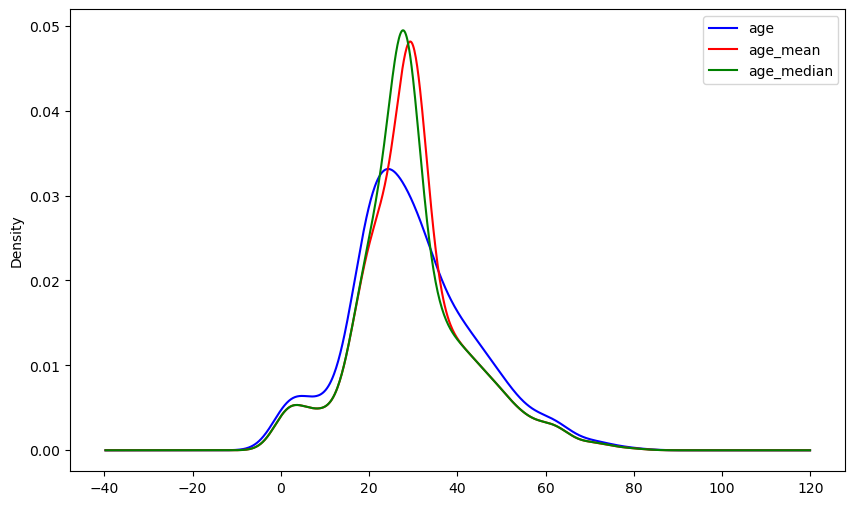

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

train_ori['age'].plot(kind='kde',ax=ax, color='blue')
train_ori['age_mean'].plot(kind='kde',ax=ax, color='red')
train_ori['age_median'].plot(kind='kde',ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [20]:
train_ori['age_random'] = train_ori['age']

random_sampling = (train_ori['age'].dropna().sample(train_ori['age'].isnull().sum()))
random_sampling.index = train_ori[lambda x: x['age'].isnull()].index
train_ori.loc[train_ori['age'].isnull(), 'age_random'] = random_sampling

train_ori[['age', 'age_random']].isnull().sum()

age           180
age_random      0
dtype: int64

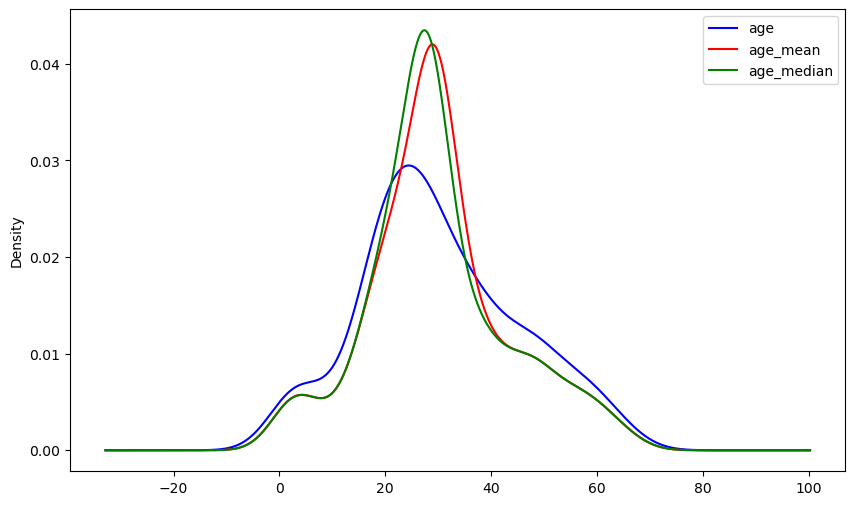

In [21]:
test_ori['age_mean'] = test_ori['age'].fillna(train_ori.age.mean())
test_ori['age_median'] = test_ori['age'].fillna(train_ori.age.median())

fig, ax = plt.subplots(figsize=(10,6))

test_ori['age'].plot(kind='kde',ax=ax, color='blue')
test_ori['age_mean'].plot(kind='kde',ax=ax, color='red')
test_ori['age_median'].plot(kind='kde',ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

age           83
age_random     0
dtype: int64


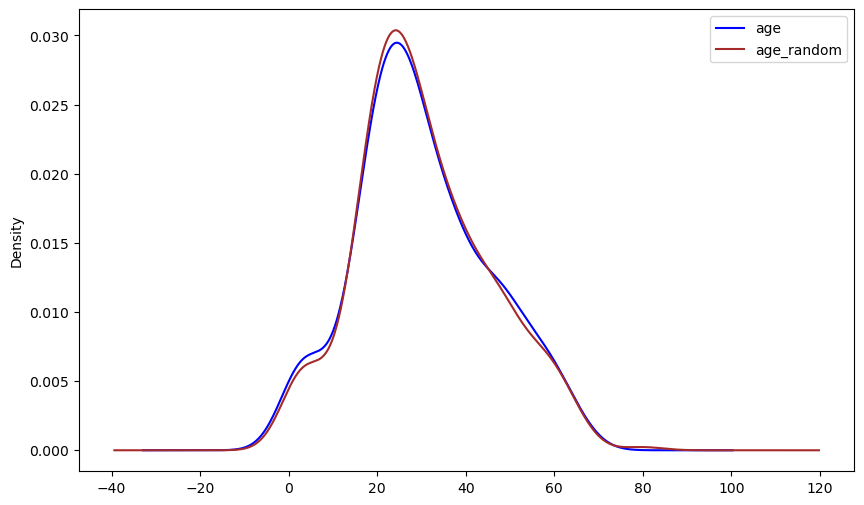

In [22]:
test_ori['age_random'] = test_ori['age']

random_sampling = (train_ori['age'].dropna().sample(test_ori['age'].isnull().sum()))
random_sampling.index = test_ori[lambda x: x['age'].isnull()].index

test_ori.loc[test_ori.age.isnull(), 'age_random'] = random_sampling
print(test_ori[['age','age_random']].isnull().sum())

fig, ax = plt.subplots(figsize=(10,6))
test_ori['age'].plot(kind='kde', ax=ax, color='blue')
test_ori['age_random'].plot(kind='kde',ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [23]:
train_ori.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'age_mean',
       'age_median', 'age_random'],
      dtype='object')

In [24]:
test_ori.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'age_mean', 'age_median',
       'age_random'],
      dtype='object')

In [25]:
train_ori.drop(labels=['age_mean','age_median','cabin'],axis=1,inplace=True)
train_ori.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'age_random'],
      dtype='object')

In [26]:
test_ori.drop(labels=['age_mean','age_median','cabin'],axis=1,inplace=True)
test_ori.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'age_random'],
      dtype='object')

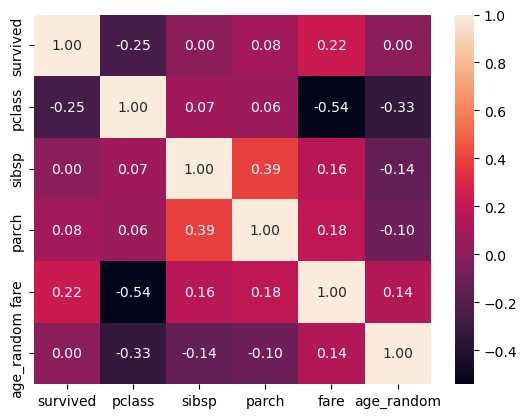

In [27]:
list1 = ['survived', 'pclass', 'name', 'gender', 'sibsp', 'parch', 'fare', 'ticket', 'embarked','age_random']
sns.heatmap(train_ori[list1].corr(), annot = True, fmt = ".2f")
plt.show()

# Model 1

In [28]:
train = train_ori.copy()
test = test_ori.copy()

In [22]:
# train.drop('cabin',axis=1, inplace=True)
# test.drop('cabin',axis=1, inplace=True)
# test.drop('passengerid',axis=1, inplace=True)
# train.drop('passengerid',axis=1, inplace=True)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
SEED = 42
X = train.drop('survived',axis=1)
y = train.survived

X_tr,X_te,y_tr,y_te = train_test_split(X, y, random_state=SEED, test_size=0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

((732, 11), (184, 11))

In [31]:
new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(['Died','Survived'])
print(new_survived[:5])
new_survived.describe()

['Died', 'Survived', 'Survived', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,456,0.622951
Survived,276,0.377049


In [32]:
# 중복제거
print(f'before: {X_tr.shape}')
train.drop_duplicates(keep='first',inplace=True, ignore_index=True)
print(f'after: {X_tr.shape}')

before: (732, 11)
after: (732, 11)


In [33]:
test.shape

(393, 11)

In [34]:
X_tr.isnull().sum().sort_values(ascending=False)

age            134
embarked         1
passengerid      0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
fare             0
age_random       0
dtype: int64

In [35]:
X_tr.embarked=X_tr.embarked.fillna(X_tr.embarked.mode().values[0])

In [36]:
X_tr.isnull().sum().sort_values(ascending=False)

age            134
passengerid      0
pclass           0
name             0
gender           0
sibsp            0
parch            0
ticket           0
fare             0
embarked         0
age_random       0
dtype: int64

In [37]:
X_te.isnull().sum().sort_values(ascending=False)

age            46
passengerid     0
pclass          0
name            0
gender          0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
age_random      0
dtype: int64

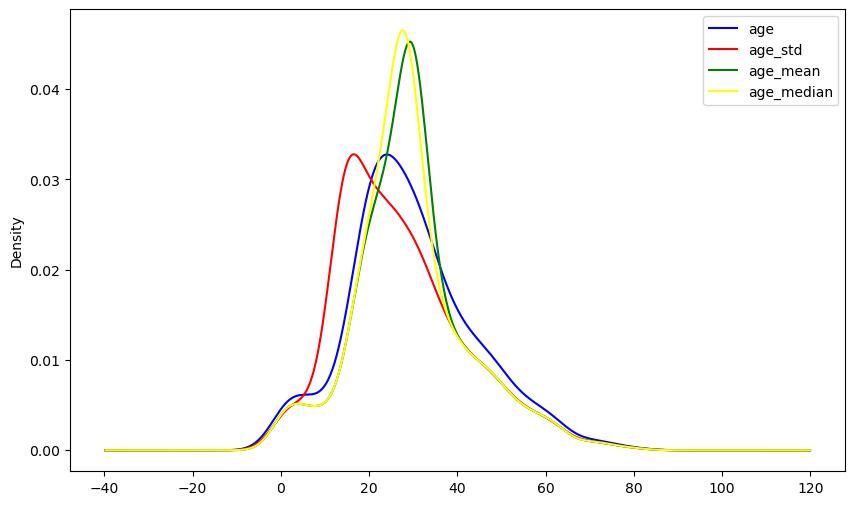

In [32]:
# X_tr['age_std']=X_tr.age.fillna(X_tr.age.std())
# X_tr['age_mean']=X_tr.age.fillna(X_tr.age.mean())
# X_tr['age_median']=X_tr.age.fillna(X_tr.age.median())

# fig, ax = plt.subplots(figsize =(10,6))

# X_tr['age'].plot(kind='kde', ax=ax, color='blue')
# X_tr['age_std'].plot(kind='kde', ax=ax, color='red')
# X_tr['age_mean'].plot(kind='kde', ax=ax, color='green')
# X_tr['age_median'].plot(kind='kde', ax=ax, color='yellow')

# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')

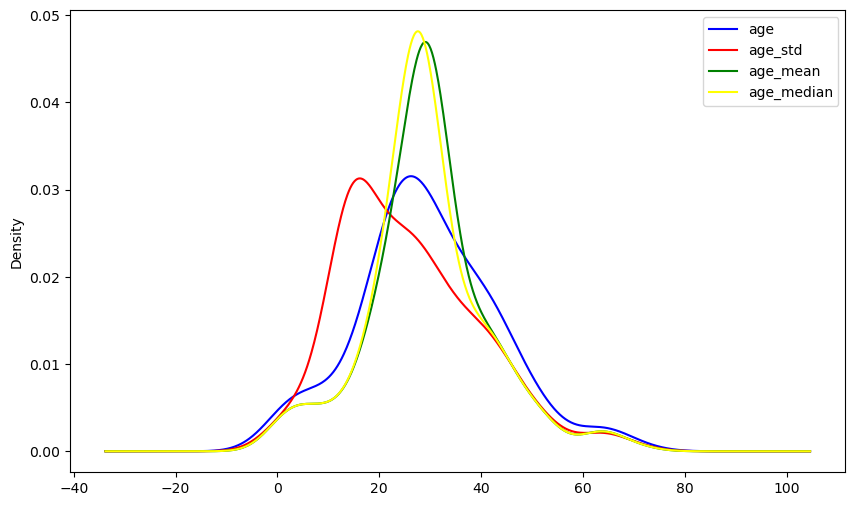

In [33]:
# X_te['age_mean'] = X_te['age'].fillna(X_tr['age'].mean())
# X_te['age_median'] = X_te['age'].fillna(X_tr.age.median())
# X_te['age_std'] = X_te['age'].fillna(X_tr.age.std())

# fig,ax =plt.subplots(figsize=(10,6))

# X_te['age'].plot(kind='kde', ax=ax, color='blue')
# X_te['age_std'].plot(kind='kde', ax=ax, color='red')
# X_te['age_mean'].plot(kind='kde', ax=ax, color='green')
# X_te['age_median'].plot(kind='kde', ax=ax, color='yellow')

# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')

In [34]:
# X_tr['age_random'] = X_tr['age']

# random_sampling = (X_tr.age.dropna().sample(X_tr.age.isnull().sum()))

# random_sampling.index = X_tr[lambda x: x['age'].isnull()].index
# X_tr.loc[X_tr.age.isnull(), 'age_random'] = random_sampling
# X_tr[['age','age_random']].isnull().sum()

age           134
age_random      0
dtype: int64

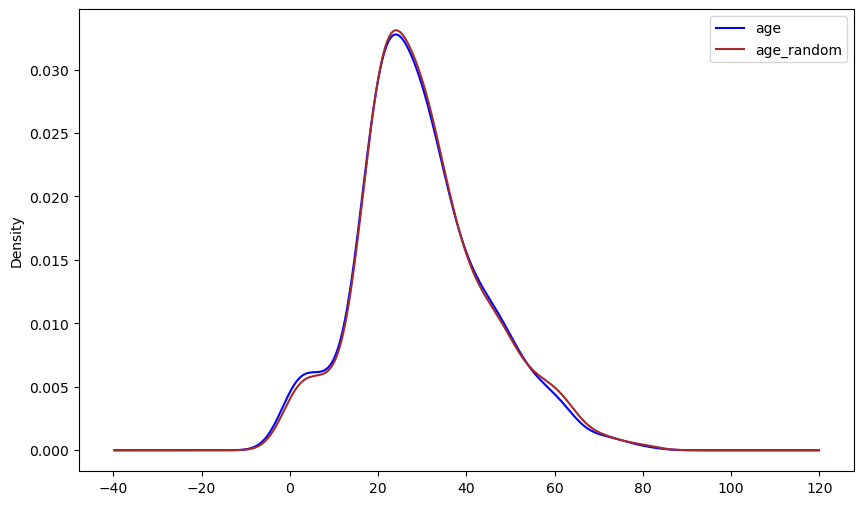

In [35]:
# fig, ax = plt.subplots(figsize=(10,6))

# X_tr.age.plot(kind='kde',ax=ax, color='blue')
# X_tr['age_random'].plot(kind='kde',ax=ax, color='brown')

# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')

age           46
age_random     0
dtype: int64


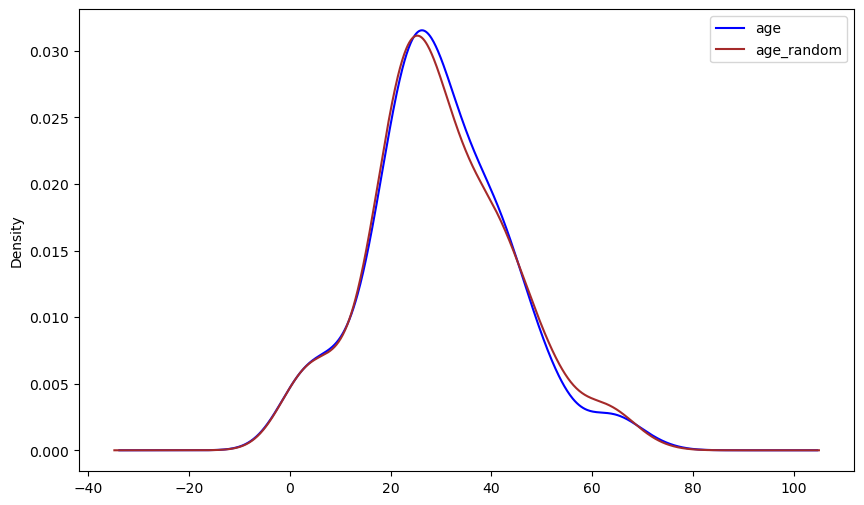

In [36]:
# X_te['age_random'] = X_te['age']

# random_sampling = (X_tr.age.dropna().sample(X_te.age.isnull().sum()))

# random_sampling.index = X_te[lambda x: x['age'].isnull()].index
# X_te.loc[X_te.age.isnull(), 'age_random'] = random_sampling
# print(X_te[['age','age_random']].isnull().sum())

# fig, ax = plt.subplots(figsize=(10,6))

# X_te.age.plot(kind='kde',ax=ax, color='blue')
# X_te.age_random.plot(kind='kde',ax=ax, color='brown')

# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')

In [37]:
# test['age_random'] = test['age']

# random_sampling = (X_tr.age.dropna().sample(test.age.isnull().sum()))

# random_sampling.index = test[lambda x: x['age'].isnull()].index
# test.loc[test.age.isnull(), 'age_random'] = random_sampling
# print(test[['age','age_random']].isnull().sum())

age           0
age_random    0
dtype: int64


In [38]:
X_tr.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'age_random'],
      dtype='object')

In [39]:
# embarked_mode = X_tr['embarked'].mode()
X_tr.embarked.isnull().sum()

0

In [40]:
X_tr

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked,age_random
0,25,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,S,24.0
1,84,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,S,21.0
2,10,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,S,54.0
3,797,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,S,18.5
4,451,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,C,9.0
...,...,...,...,...,...,...,...,...,...,...,...
727,106,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,S,39.0
728,270,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,Q,24.0
729,860,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S,30.0
730,435,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,C,18.5


In [41]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  732 non-null    int64  
 1   pclass       732 non-null    int64  
 2   name         732 non-null    object 
 3   gender       732 non-null    object 
 4   age          598 non-null    float64
 5   sibsp        732 non-null    int64  
 6   parch        732 non-null    int64  
 7   ticket       732 non-null    object 
 8   fare         732 non-null    float64
 9   embarked     732 non-null    object 
 10  age_random   732 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 63.0+ KB


In [42]:
X_tr.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'age_random'],
      dtype='object')

In [43]:
# 모델에서 숫자만 읽을수 있고, 필요없는 컬럼은 삭제한다.
X_tr.drop(labels = ['age', 'name', 'gender', 'ticket', 'embarked'],axis=1, inplace=True)
X_tr.columns

Index(['passengerid', 'pclass', 'sibsp', 'parch', 'fare', 'age_random'], dtype='object')

In [44]:
X_te.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'age_random'],
      dtype='object')

In [45]:
X_te.drop(labels = ['age', 'name', 'gender', 'ticket', 'embarked'],axis=1, inplace=True)
X_te.columns

Index(['passengerid', 'pclass', 'sibsp', 'parch', 'fare', 'age_random'], dtype='object')

In [46]:
test.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'age_random'],
      dtype='object')

In [47]:
test.drop(labels = ['age', 'name', 'gender', 'ticket', 'embarked'],axis=1, inplace=True)
test.columns

Index(['passengerid', 'pclass', 'sibsp', 'parch', 'fare', 'age_random'], dtype='object')

In [48]:
from sklearn.linear_model import LogisticRegression

# logistic regression
lr_clf = LogisticRegression()

# 훈련
lr_clf.fit(X_tr, y_tr)

C:\Users\jaehee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score

# 예측
pred = lr_clf.predict(X_te)


# 정확도 측정
accuracy_score(y_te, pred)

0.625

In [50]:
#set ids as PassengerId and predict survival 
ids = test_ori['passengerid']
predictions = lr_clf.predict(test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('model1_1_submission.csv', index=False)